# Pytorch Introduction

 A starter tutorial on __pytorch__. Aims at introducing pytorch through examples namely by implementing

_1) Linear Regression_

_2) Logistic Regression_

_3) Simple Neural Network_

Before going into implementations let's understand the basic unit of pytorch i.e a __Tensor__.

A tensor is a simple n dimensional array similar to numpy but can run on GPU's. Hence computation can be spedup.

Another important feature that pytorch provides is __autograd__. i.e automatic differentiation wrt variables, this helps us obtain the gradient during the backpropagation step in any neural network

Now that we know the basic inners of pytorch. Let's try and implement the most basic ML algo.

## 1. Linear Regression

### <span style="color:red">a. without using autograd.</span>

In [120]:
import torch
import numpy as np

In [121]:
#declaring data
x = torch.Tensor([[1.0],[2.0],[4.0],[5.0]])
y = torch.Tensor([[2.0],[4.0],[8.0],[10.0]])

In [122]:
#since linear_reg initialize a 1*1 weight
w = torch.randn(1,1).type(torch.FloatTensor)

In [123]:
# set learning rate
lr = 1e-4

In [124]:
a= []
b = []
c = []
for t in range(1000):
    y_pred = x.mm(w)
    loss = np.square(y_pred - y).sum()
    print(t, loss)
    a.append(t)
    b.append(loss)
    grad_ypred_loss = 2*(y_pred - y)
    grad_w = x.view(1,4).mm(grad_ypred_loss)# x.view() is similar to reshape function of numpy
    w -= lr*grad_w
    c.append(w[0][0])

0 226.53116607666016
1 222.382164478302
2 218.30916786193848
3 214.31075477600098
4 210.38556718826294
5 206.53228425979614
6 202.74955558776855
7 199.03614330291748
8 195.39069986343384
9 191.8120584487915
10 188.29895687103271
11 184.8501877784729
12 181.46459293365479
13 178.14100790023804
14 174.87829160690308
15 171.67533826828003
16 168.531023979187
17 165.44433689117432
18 162.41415286064148
19 159.43947982788086
20 156.51927781105042
21 153.65257692337036
22 150.83839011192322
23 148.07571744918823
24 145.3636553287506
25 142.70126914978027
26 140.08764004707336
27 137.5218870639801
28 135.00311613082886
29 132.53049159049988
30 130.10315251350403
31 127.7202479839325
32 125.38102316856384
33 123.08462715148926
34 120.83028721809387
35 118.61723351478577
36 116.44471597671509
37 114.31198358535767
38 112.21834063529968
39 110.16300702095032
40 108.14533519744873
41 106.16460418701172
42 104.22016644477844
43 102.31133770942688
44 100.43747162818909
45 98.59792566299438
46 96.79

478 0.032941785582806915
479 0.032338674645870924
480 0.03174639312783256
481 0.031165037187747657
482 0.030594330513849854
483 0.030034007038921118
484 0.029483802209142596
485 0.028943813289515674
486 0.028413661930244416
487 0.027893212507478893
488 0.027382565662264824
489 0.02688099816441536
490 0.026388619269710034
491 0.025905418675392866
492 0.02543092641280964
493 0.024965129676274955
494 0.024507804249878973
495 0.02405905252089724
496 0.02361842175014317
497 0.023185804369859397
498 0.02276108757359907
499 0.022344164724927396
500 0.021934927644906566
501 0.021533062943490222
502 0.021138772077392787
503 0.02075164864072576
504 0.020371489226818085
505 0.019998597534140572
506 0.01963227824307978
507 0.019272833480499685
508 0.018919679103419185
509 0.018573214940261096
510 0.018233056413009763
511 0.01789921656018123
512 0.017571322561707348
513 0.01724966280744411
514 0.016933784034335986
515 0.0166236923832912
516 0.01631922330125235
517 0.016020207171095535
518 0.0157268

913 1.0608420097923954e-05
914 1.0410474331479236e-05
915 1.0218887211976835e-05
916 1.0035871412128472e-05
917 9.85009575060758e-06
918 9.670427800756443e-06
919 9.494688086419956e-06
920 9.320559911429882e-06
921 9.148043275786222e-06
922 8.983564114828368e-06
923 8.820577093615611e-06
924 8.654944920749585e-06
925 8.501231434365764e-06
926 8.344832806983504e-06
927 8.189886330001173e-06
928 8.04037831869664e-06
929 7.894321655044223e-06
930 7.749603767592816e-06
931 7.60622465634242e-06
932 7.466201395800454e-06
933 7.331285544864841e-06
934 7.197599927621923e-06
935 7.061407430342115e-06
936 6.935863055446134e-06
937 6.807775392303483e-06
938 6.680881554643747e-06
939 6.560672773048282e-06
940 6.441555299829815e-06
941 6.323529134988348e-06
942 6.20659427852388e-06
943 6.092572633065174e-06
944 5.9830470746646824e-06
945 5.8711072625783345e-06
946 5.763599872921077e-06
947 5.6588417578495864e-06
948 5.555044438665391e-06
949 5.45220791536849e-06
950 5.350332187958884e-06
951 5.2543

In [126]:
print(loss)
print(w[0][0])

2.163193315141143e-06
1.9997851848602295


In [127]:
# plotting the loss functions
import matplotlib.pyplot as plt
%matplotlib inline

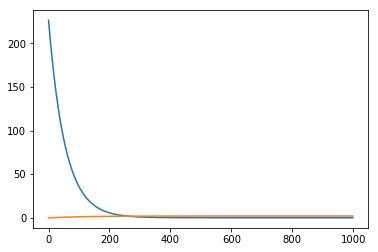

In [133]:
plt.plot(a,b)
#plt.show()
plt.plot(a,c)
#plt.show()

### <span style="color:red">b. with using autograd i.e automating the backward pass</span>

The __autograd__ feature we mentioned previously cannot be directly used with pytorch tensors. We need to wrap these tensors in __Variables__ to use the feature.

In the computational graph we are going to build, this __variable__ object is going to be one of the nodes.

If __w__ is a Variable then __w.data__ is a Tensor, and __w.grad__ is another Variable holding the gradient of x with respect to some scalar value (usually the loss function).

In [140]:
import torch
import numpy as np

In [150]:
#declaring data
x = torch.Tensor([[1.0],[2.0],[4.0],[5.0]])
y = torch.Tensor([[2.0],[4.0],[8.0],[10.0]])

In [151]:
from torch.autograd import Variable

# wrapping up the data in variables
x = Variable(x, requires_grad = False)
y = Variable(y, requires_grad = False)

In [144]:
print(type(x))       # Variable
print(type(x.data))  # Tensor 

<class 'torch.autograd.variable.Variable'>
<class 'torch.FloatTensor'>


In [145]:
# variable with values
print(x)

Variable containing:
 1
 2
 4
 5
[torch.FloatTensor of size 4x1]



In [179]:
# intializing the weight and wrapping it up in a variable
w = torch.randn(1,1).type(torch.FloatTensor)
w = Variable(w, requires_grad = True)

In [180]:
lr = 1e-4

In [181]:
a= []
b = []
c = []
for t in range(1000):
    y_pred = x.mm(w)
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])
    a.append(t)
    b.append(loss.data[0])
    loss.backward()
    w.data -= lr*w.grad.data
    c.append(w.data[0][0])
    w.grad.data.zero_()

0 145.12461853027344
1 142.4665985107422
2 139.8572998046875
3 137.29576110839844
4 134.7811279296875
5 132.31256103515625
6 129.8892059326172
7 127.51025390625
8 125.17485046386719
9 122.88221740722656
10 120.63159942626953
11 118.42218017578125
12 116.25325012207031
13 114.1240234375
14 112.03379821777344
15 109.98186492919922
16 107.9675064086914
17 105.99003601074219
18 104.04879760742188
19 102.14310455322266
20 100.27230834960938
21 98.43578338623047
22 96.6329116821289
23 94.86304473876953
24 93.12557983398438
25 91.41995239257812
26 89.74556732177734
27 88.10184478759766
28 86.48823547363281
29 84.90415954589844
30 83.34911346435547
31 81.82254791259766
32 80.32393646240234
33 78.85277557373047
34 77.40855407714844
35 75.99078369140625
36 74.59899139404297
37 73.23268127441406
38 71.89139556884766
39 70.57467651367188
40 69.2820816040039
41 68.01314544677734
42 66.76746368408203
43 65.54460144042969
44 64.34412384033203
45 63.16563415527344
46 62.00873565673828
47 60.8730239868

442 0.04105474054813385
443 0.040302738547325134
444 0.039564840495586395
445 0.03884013742208481
446 0.03812858462333679
447 0.03743041679263115
448 0.03674490749835968
449 0.0360720120370388
450 0.0354112833738327
451 0.034762825816869736
452 0.03412606567144394
453 0.03350098431110382
454 0.032887283712625504
455 0.03228480741381645
456 0.03169340267777443
457 0.03111291117966175
458 0.030543187633156776
459 0.029983464628458023
460 0.029434459283947945
461 0.028895413503050804
462 0.028366195037961006
463 0.02784689888358116
464 0.02733680047094822
465 0.026836127042770386
466 0.026344627141952515
467 0.025862175971269608
468 0.02538842335343361
469 0.024923473596572876
470 0.02446720190346241
471 0.024018937721848488
472 0.023579007014632225
473 0.023147188127040863
474 0.022723263129591942
475 0.022307120263576508
476 0.021898649632930756
477 0.021497638896107674
478 0.021103888750076294
479 0.02071739360690117
480 0.02033785730600357
481 0.01996537856757641
482 0.019599664956331

911 7.053749413898913e-06
912 6.924572971911402e-06
913 6.800256414862815e-06
914 6.673432835668791e-06
915 6.5532917687960435e-06
916 6.4342416408180725e-06
917 6.31274906481849e-06
918 6.195914465934038e-06
919 6.085459517635172e-06
920 5.972561666567344e-06
921 5.864124887011712e-06
922 5.753308414568892e-06
923 5.6519866120652296e-06
924 5.5482528296124656e-06
925 5.445479473564774e-06
926 5.343666543922154e-06
927 5.2477262215688825e-06
928 5.149463049747283e-06
929 5.055289875599556e-06
930 4.961985723639373e-06
931 4.87117995362496e-06
932 4.784287739312276e-06
933 4.695129973697476e-06
934 4.6068112169450615e-06
935 4.523890311247669e-06
936 4.441722921910696e-06
937 4.360308139439439e-06
938 4.279646873328602e-06
939 4.199738214083482e-06
940 4.124936822336167e-06
941 4.050807547173463e-06
942 3.974546871177154e-06
943 3.901787295035319e-06
944 3.8311450225592125e-06
945 3.761148263947689e-06
946 3.6944989005860407e-06
947 3.6257674764783587e-06
948 3.5576813388615847e-06
949 

In [182]:
print(loss)
print(w)

Variable containing:
1.00000e-06 *
  1.3833
[torch.FloatTensor of size 1]

Variable containing:
 1.9998
[torch.FloatTensor of size 1x1]



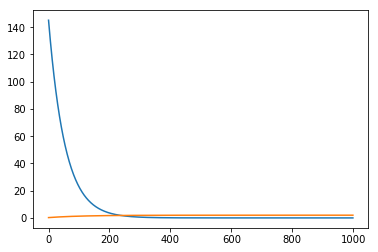

In [185]:
plt.plot(a,b)
#plt.show()
plt.plot(a,c)
#plt.show()

## 2. Logistic Regression

In [50]:
import torch
import numpy as np

In [51]:
from torch.autograd import Variable

# declaring data
x = Variable(torch.Tensor([[1.0], [2.0], [3.0], [4.0]]), requires_grad = False)
y = Variable(torch.Tensor([[0.], [0.], [1.], [1.]]), requires_grad = False)

w = Variable(torch.randn(1,1).type(torch.FloatTensor), requires_grad = True)

In [52]:
import torch.nn.functional as F
# Binary cross entropy loss
criterion = torch.nn.BCELoss(size_average=True)
# sigmoid fuction is in F
# learning rate
lr = 1e-2

In [53]:
a= []
b = []
c = []
for t in range(2000):
    y_pred = F.sigmoid(x.mm(w))
    loss = criterion(y_pred, y)
    print(t, loss.data[0])
    a.append(t)
    b.append(loss.data[0])
    loss.backward()
    w.data -= lr*w.grad.data
    c.append(w.data[0][0])
    w.grad.data.zero_()

0 0.7657031416893005
1 0.7633874416351318
2 0.7610963582992554
3 0.7588298320770264
4 0.7565877437591553
5 0.754370391368866
6 0.7521775364875793
7 0.7500091791152954
8 0.7478654980659485
9 0.7457461357116699
10 0.7436516284942627
11 0.7415812611579895
12 0.7395354509353638
13 0.737514078617096
14 0.7355170249938965
15 0.7335442900657654
16 0.7315959930419922
17 0.7296717166900635
18 0.7277718186378479
19 0.7258957624435425
20 0.7240439653396606
21 0.7222159504890442
22 0.7204120755195618
23 0.7186317443847656
24 0.7168751955032349
25 0.7151421904563904
26 0.713433027267456
27 0.7117470502853394
28 0.7100844979286194
29 0.7084450721740723
30 0.7068288326263428
31 0.7052356004714966
32 0.7036651372909546
33 0.702117383480072
34 0.7005923986434937
35 0.6990898251533508
36 0.6976096034049988
37 0.6961516737937927
38 0.6947157382965088
39 0.693301796913147
40 0.6919094920158386
41 0.6905388236045837
42 0.689189612865448
43 0.6878618597984314
44 0.6865550875663757
45 0.6852691769599915
46 0

407 0.6239601373672485
408 0.6239600777626038
409 0.6239599585533142
410 0.6239598393440247
411 0.6239598393440247
412 0.6239598393440247
413 0.6239597797393799
414 0.6239596605300903
415 0.6239596009254456
416 0.6239596009254456
417 0.6239594221115112
418 0.6239594221115112
419 0.6239593625068665
420 0.6239593625068665
421 0.6239593029022217
422 0.6239592432975769
423 0.6239591836929321
424 0.6239591836929321
425 0.6239591240882874
426 0.6239591240882874
427 0.6239590048789978
428 0.6239590048789978
429 0.6239590048789978
430 0.623958945274353
431 0.6239588856697083
432 0.6239588856697083
433 0.6239588260650635
434 0.6239587664604187
435 0.6239587664604187
436 0.6239587068557739
437 0.6239587068557739
438 0.6239586472511292
439 0.6239585876464844
440 0.6239586472511292
441 0.6239586472511292
442 0.6239586472511292
443 0.6239585280418396
444 0.6239585280418396
445 0.6239585280418396
446 0.6239584684371948
447 0.6239584684371948
448 0.6239584684371948
449 0.62395840883255
450 0.62395840

896 0.6239577531814575
897 0.6239577531814575
898 0.6239577531814575
899 0.6239577531814575
900 0.6239577531814575
901 0.6239577531814575
902 0.6239577531814575
903 0.6239577531814575
904 0.6239577531814575
905 0.6239577531814575
906 0.6239577531814575
907 0.6239577531814575
908 0.6239577531814575
909 0.6239577531814575
910 0.6239577531814575
911 0.6239577531814575
912 0.6239577531814575
913 0.6239577531814575
914 0.6239577531814575
915 0.6239577531814575
916 0.6239577531814575
917 0.6239577531814575
918 0.6239577531814575
919 0.6239577531814575
920 0.6239577531814575
921 0.6239577531814575
922 0.6239577531814575
923 0.6239577531814575
924 0.6239577531814575
925 0.6239577531814575
926 0.6239577531814575
927 0.6239577531814575
928 0.6239577531814575
929 0.6239577531814575
930 0.6239577531814575
931 0.6239577531814575
932 0.6239577531814575
933 0.6239577531814575
934 0.6239577531814575
935 0.6239577531814575
936 0.6239577531814575
937 0.6239577531814575
938 0.6239577531814575
939 0.62395

1402 0.6239577531814575
1403 0.6239577531814575
1404 0.6239577531814575
1405 0.6239577531814575
1406 0.6239577531814575
1407 0.6239577531814575
1408 0.6239577531814575
1409 0.6239577531814575
1410 0.6239577531814575
1411 0.6239577531814575
1412 0.6239577531814575
1413 0.6239577531814575
1414 0.6239577531814575
1415 0.6239577531814575
1416 0.6239577531814575
1417 0.6239577531814575
1418 0.6239577531814575
1419 0.6239577531814575
1420 0.6239577531814575
1421 0.6239577531814575
1422 0.6239577531814575
1423 0.6239577531814575
1424 0.6239577531814575
1425 0.6239577531814575
1426 0.6239577531814575
1427 0.6239577531814575
1428 0.6239577531814575
1429 0.6239577531814575
1430 0.6239577531814575
1431 0.6239577531814575
1432 0.6239577531814575
1433 0.6239577531814575
1434 0.6239577531814575
1435 0.6239577531814575
1436 0.6239577531814575
1437 0.6239577531814575
1438 0.6239577531814575
1439 0.6239577531814575
1440 0.6239577531814575
1441 0.6239577531814575
1442 0.6239577531814575
1443 0.623957753

1914 0.6239577531814575
1915 0.6239577531814575
1916 0.6239577531814575
1917 0.6239577531814575
1918 0.6239577531814575
1919 0.6239577531814575
1920 0.6239577531814575
1921 0.6239577531814575
1922 0.6239577531814575
1923 0.6239577531814575
1924 0.6239577531814575
1925 0.6239577531814575
1926 0.6239577531814575
1927 0.6239577531814575
1928 0.6239577531814575
1929 0.6239577531814575
1930 0.6239577531814575
1931 0.6239577531814575
1932 0.6239577531814575
1933 0.6239577531814575
1934 0.6239577531814575
1935 0.6239577531814575
1936 0.6239577531814575
1937 0.6239577531814575
1938 0.6239577531814575
1939 0.6239577531814575
1940 0.6239577531814575
1941 0.6239577531814575
1942 0.6239577531814575
1943 0.6239577531814575
1944 0.6239577531814575
1945 0.6239577531814575
1946 0.6239577531814575
1947 0.6239577531814575
1948 0.6239577531814575
1949 0.6239577531814575
1950 0.6239577531814575
1951 0.6239577531814575
1952 0.6239577531814575
1953 0.6239577531814575
1954 0.6239577531814575
1955 0.623957753

In [54]:
print(loss)
print(w[0][0])

Variable containing:
 0.6240
[torch.FloatTensor of size 1]

Variable containing:
 0.2877
[torch.FloatTensor of size 1]



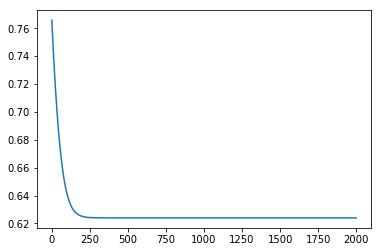

In [55]:
# plotting the loss functions
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(a,b)
#plt.show()
#plt.plot(a,dc)
#plt.show()

In [56]:
x_test = torch.Tensor([[1.0]])
x_test


 1
[torch.FloatTensor of size 1x1]

In [57]:
w.data


 0.2877
[torch.FloatTensor of size 1x1]

In [58]:
y_p = F.sigmoid(x_test.mm(w.data))

In [59]:
y_p

Variable containing:
 0.5714
[torch.FloatTensor of size 1x1]

## 3. Simple Neural Network

In [60]:
import torch
from torch.autograd import Variable

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs, and wrap them in Variables.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Variables during the backward pass.
x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

# Create random Tensors for weights, and wrap them in Variables.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Variables during the backward pass.
w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6

In [61]:
a = []
b = []
c = []
for t in range(500):
    # Forward pass: compute predicted y using operations on Variables; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Variables.
    # Now loss is a Variable of shape (1,) and loss.data is a Tensor of shape
    # (1,); loss.data[0] is a scalar value holding the loss.
    loss = (y_pred - y).pow(2).sum()
    a.append(t)
    b.append(loss.data[0])
    print(t, loss.data[0])

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Variables with requires_grad=True.
    # After this call w1.grad and w2.grad will be Variables holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Update weights using gradient descent; w1.data and w2.data are Tensors,
    # w1.grad and w2.grad are Variables and w1.grad.data and w2.grad.data are
    # Tensors.
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

    # Manually zero the gradients after updating weights
    w1.grad.data.zero_()
    w2.grad.data.zero_()

0 33565348.0
1 31723088.0
2 30057874.0
3 24965110.0
4 17388754.0
5 10352907.0
6 5768883.5
7 3311738.5
8 2093825.875
9 1471691.625
10 1123710.875
11 904957.5
12 751667.4375
13 636424.5625
14 545279.3125
15 470992.625
16 409251.8125
17 357341.40625
18 313384.21875
19 275843.28125
20 243621.53125
21 215830.203125
22 191773.15625
23 170873.265625
24 152642.234375
25 136699.25
26 122705.0703125
27 110376.1796875
28 99489.5390625
29 89858.9609375
30 81311.1171875
31 73707.4140625
32 66927.828125
33 60878.2578125
34 55463.0390625
35 50609.30859375
36 46246.359375
37 42316.578125
38 38771.703125
39 35576.671875
40 32680.88671875
41 30052.966796875
42 27666.041015625
43 25493.1796875
44 23514.203125
45 21707.302734375
46 20057.681640625
47 18548.568359375
48 17167.08203125
49 15900.505859375
50 14742.8173828125
51 13679.982421875
52 12702.7470703125
53 11804.3818359375
54 10976.775390625
55 10214.044921875
56 9510.42578125
57 8860.546875
58 8259.841796875
59 7704.19677734375
60 7189.75439453125

444 0.0001582983386470005
445 0.00015510529919993132
446 0.00015203567454591393
447 0.00014861818635836244
448 0.00014603415911551565
449 0.0001430354459444061
450 0.000140182048198767
451 0.0001372582046315074
452 0.00013454204599838704
453 0.00013197628140915185
454 0.00012918251741211861
455 0.00012644070375245064
456 0.00012389088806230575
457 0.00012191577116027474
458 0.00011933195492019877
459 0.00011711745901266113
460 0.0001148922965512611
461 0.0001130248565459624
462 0.0001109432996599935
463 0.00010876197484321892
464 0.00010690048657124862
465 0.00010473081056261435
466 0.00010334958642488346
467 0.00010120905062649399
468 9.951594256563112e-05
469 9.7822499810718e-05
470 9.587992099113762e-05
471 9.425084135727957e-05
472 9.287381544709206e-05
473 9.112769475905225e-05
474 8.968042675405741e-05
475 8.780876669334248e-05
476 8.655460260342807e-05
477 8.522918506059796e-05
478 8.374019671464339e-05
479 8.242148760473356e-05
480 8.116563549265265e-05
481 7.986298442119732e-0

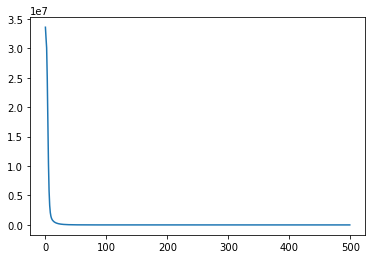

In [62]:
plt.plot(a,b)

In [68]:
# optimal parameters
print(w1)
print(w2)

Variable containing:
 1.1217e+00 -9.5349e-01  1.3353e+00  ...  -1.8488e+00  1.0414e-01 -3.6374e-01
 4.8493e-01 -8.9631e-01  3.5033e-01  ...   1.0469e+00  5.2865e-01  4.2811e-01
 2.3666e+00 -2.2114e-01  2.1911e-01  ...   7.9101e-01  7.4137e-01  6.4744e-01
                ...                   ⋱                   ...                
 3.2949e-01 -3.4530e-02  1.7556e-02  ...  -3.9426e-02  9.8851e-02 -5.9164e-02
 8.9785e-01 -1.4680e-01 -3.3555e-02  ...   4.1818e-01  5.4283e-01 -1.7253e-02
 6.6289e-01 -1.0183e+00 -1.3520e+00  ...  -6.7641e-01 -3.0350e+00 -1.6297e+00
[torch.FloatTensor of size 1000x100]

Variable containing:
-1.1093  0.7402 -1.3615  ...   0.6513 -0.0103  0.6875
-0.5590 -0.2743 -2.8347  ...  -0.1867  0.2638  0.6203
-1.0071  0.2208  1.4905  ...  -1.0298 -0.0163 -1.4577
          ...             ⋱             ...          
-0.5863 -0.1632  0.7613  ...  -0.2943 -0.3273 -0.4683
 0.3070 -0.6590  0.5029  ...  -0.8252 -0.2441 -0.1412
 0.8379  0.3335 -0.4788  ...   0.1768 -0.0934 -0.7

In [67]:
# final loss
print(loss.data)


1.00000e-05 *
  6.0615
[torch.FloatTensor of size 1]

